In [1]:
from y0.graph import NxMixedGraph, DEFAULT_TAG
from y0.dsl import X, Y
from y0.examples import identifiability_2
from y0.algorithm.identify import identify, Identification
from y0.algorithm.taheri_design import simplify_latent_dag

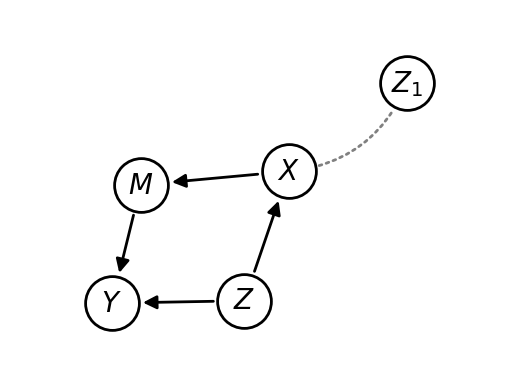

In [2]:
#graph = identifiability_2
graph = NxMixedGraph.from_str_edges(
            directed=[
                ("Z", "X"),
                ("Z", "Y"),
                ("X", "M"),
                ("M", "Y"),
            ],
            undirected=[
                ("Z1", "X"),
            ],
        )

graph.draw()

In [4]:
estimand = identify(
    Identification.from_parts(
        graph=graph, outcomes={Y}, treatments={X}
    )
)
estimand

Sum[M, Z](P(Y | M, X, Z) * P(M | X, Z) * Sum(Sum[M, X, Y](Sum[Z1](P(M, X, Y, Z, Z1)))))

In [4]:
nuisance = set(graph.nodes()).difference(estimand.get_variables())
nuisance

set()

In [5]:
lv_dag = graph.to_latent_variable_dag()
lv_dag

In [6]:
for v in nuisance:
    lv_dag[v][DEFAULT_TAG] = True

In [7]:
simplify_latent_dag(lv_dag)

SimplifyResults(graph=<networkx.classes.digraph.DiGraph object at 0x1363bd150>, widows=set(), redundant=set())

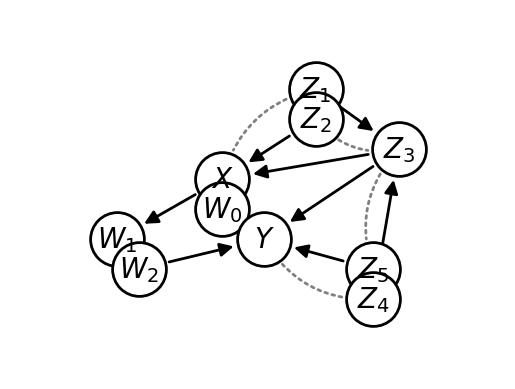

In [8]:
new_graph = NxMixedGraph.from_latent_variable_dag(lv_dag)
new_graph.draw()